# Predecir la cantidad de crímenes por día en Chicago
- Serie de tiempo

### Autores
   * Merelyn Rodríguez Rojas

## Análisis del Problema
Con el objetivo de predecir los crímines, el departamento de policía de Chicago ha recolectado datos sobre acotecimientos criminales que han ocurrido desde la ciudad desde el 2001 al 2004.

Con esta información, lo que los encargados de la seguridad de la ciudad desean, es que se prediga la cantidad de crímenes por día en Chicago.

![crimen_chicago](https://www.lavanguardia.com/files/image_449_220/uploads/2017/01/07/5fa3c30b3e7e8.jpeg)

## Librerías

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

from sklearn.linear_model import LinearRegression

## Entendimiento de los Datos

In [ ]:
data = pd.read_csv('/content/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)

In [ ]:
# Limpiar la data
data.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 
           'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward',
           'Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], 
          inplace=True, axis=1)

data = data[data['Location Description'].notna()]

In [ ]:
#print(data.isnull().any())

In [ ]:
#shape
data.shape

(1193357, 8)

In [ ]:
#head of data

data.head()

ID                    Date  ... Arrest Domestic
0  4786321  01/01/2004 12:01:00 AM  ...  False    False
1  4676906  03/01/2003 12:00:00 AM  ...  False     True
2  4789749  06/20/2004 11:00:00 AM  ...  False    False
3  4789765  12/30/2004 08:00:00 PM  ...  False    False
4  4677901  05/01/2003 01:00:00 AM  ...  False    False

[5 rows x 8 columns]

In [ ]:
#tail of data

data.tail()

ID                    Date  ... Arrest Domestic
1193359  2807836  06/29/2003 04:10:00 PM  ...   True     True
1193360  2807837  06/21/2003 07:20:00 AM  ...  False    False
1193361  2807839  06/27/2003 07:30:00 PM  ...  False    False
1193362  2807840  06/26/2003 05:02:58 PM  ...  False    False
1193363  2807846  06/29/2003 06:55:00 PM  ...  False    False

[5 rows x 8 columns]

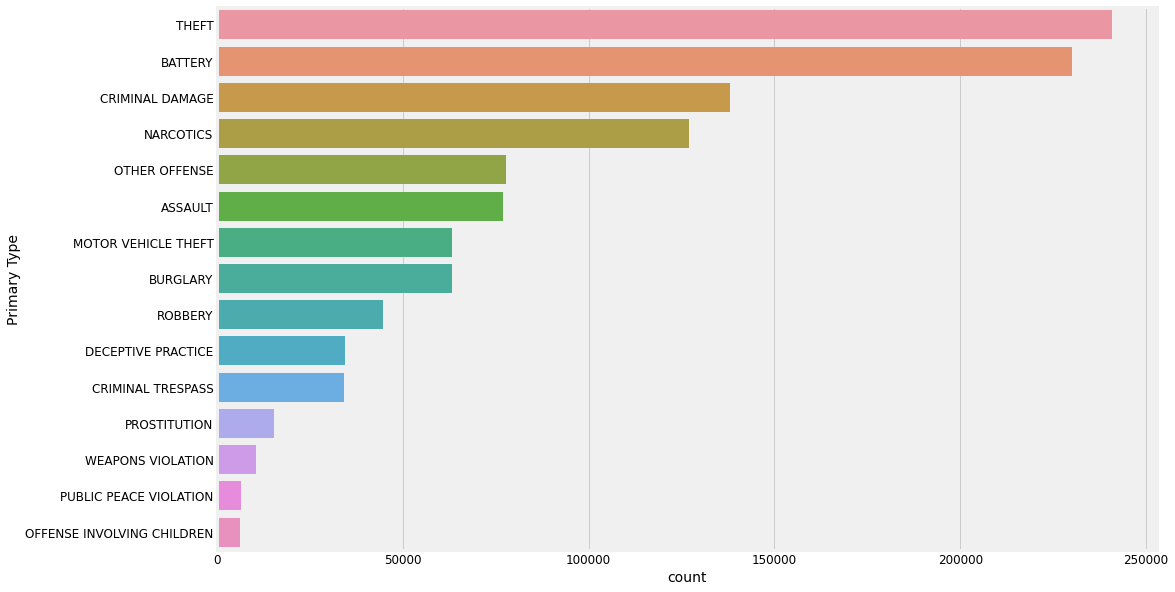

In [ ]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = data, order = data['Primary Type'].value_counts().iloc[:15].index)

In [ ]:
# Agrupar por cantidad de crímenes por fecha ya que no se brindó ese dato exacto.
data_count = data.groupby("Date")["Date"].count() 
# Convertir en dataframe
data = pd.DataFrame({"Date":data_count.index, "Count":data_count.values}) 
data["Date"]=pd.to_datetime(data["Date"])
data = data.set_index('Date')

In [ ]:
data

Count
Date                      
2001-01-01 01:00:00     30
2001-01-01 13:00:00     21
2001-01-01 13:00:39      1
2001-01-01 01:01:44      1
2001-01-01 01:02:29      1
...                    ...
2004-12-31 09:34:00      1
2004-12-31 10:00:00      1
2004-12-31 00:00:00      1
2004-12-31 12:00:00      2
2004-12-31 00:01:00      2

[490216 rows x 1 columns]

In [ ]:
y = data['Count'].resample(rule='1H',).sum()
y

Date
2001-01-01 00:00:00    338
2001-01-01 01:00:00     89
2001-01-01 02:00:00     78
2001-01-01 03:00:00     70
2001-01-01 04:00:00     53
                      ... 
2004-12-31 11:00:00      0
2004-12-31 12:00:00      2
2004-12-31 13:00:00      0
2004-12-31 14:00:00      0
2004-12-31 15:00:00      1
Freq: H, Name: Count, Length: 35056, dtype: int64

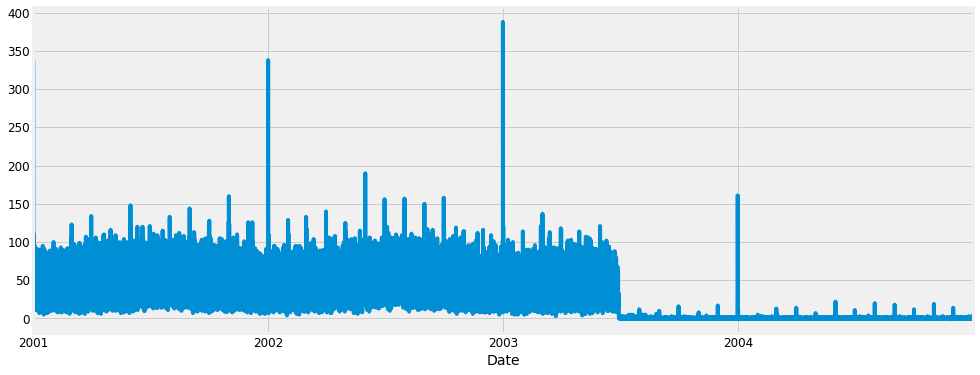

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

La cantidad de crímenes siguen un patrón muy similar entre año y año. Algo muy notorio que llama mucho la atención es que al inicio de cada año hay un disparo de incremento en los números; es decir, los primeros días del año, hay muchos más crímenes.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490216 entries, 2001-01-01 01:00:00 to 2004-12-31 00:01:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Count   490216 non-null  int64
dtypes: int64(1)
memory usage: 7.5 MB


## Exploración de los Datos

In [ ]:
#data.index = data.Date

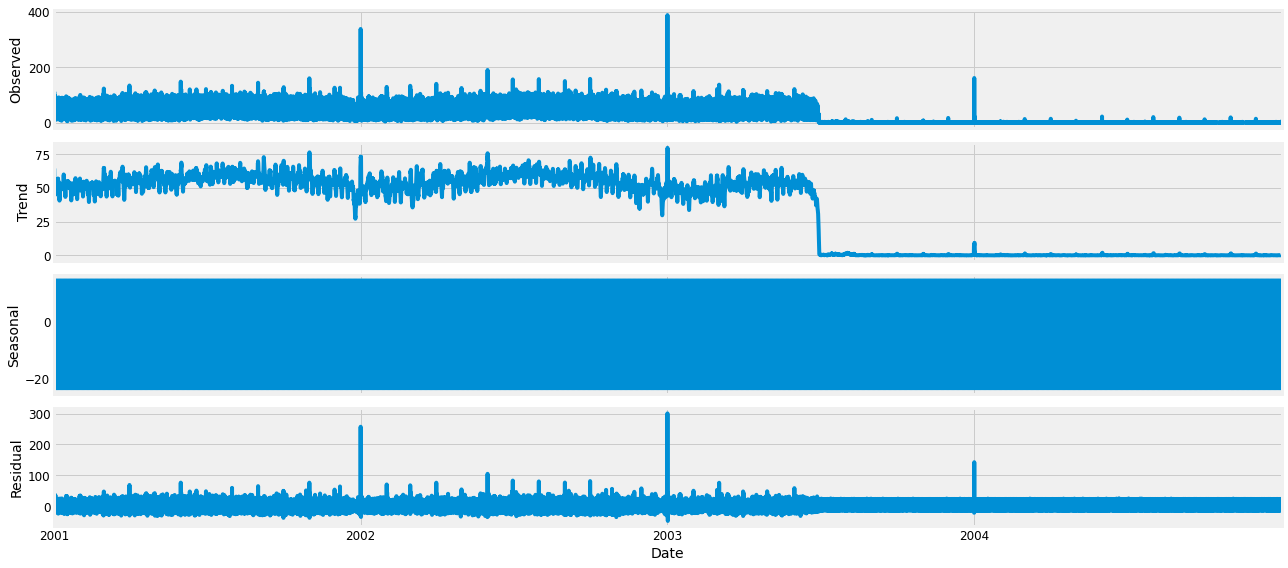

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Modelo de Machine Learning

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:369249.6581072064
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:358709.90390888625
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:341292.4487290802
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:300521.3945437183
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:337116.00795709976
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:300624.21623398166
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:273378.84985451546
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:272549.44779187883
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:335373.16995900404
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:326336.73008767754
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:316252.2649976209
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:280715.73027208715
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:310958.5826982691
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:280816.9652052905
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:269141.1586996032
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:268074.40913247596
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:274719.5778065553
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:274010.5968537419
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:29

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:263446.049177079
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:267821.8630007584
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:261814.22895641052


In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0949      0.005     18.753      0.000       0.085       0.105
ma.L1         -0.6632      0.004   -150.602      0.000      -0.672      -0.655
ar.S.L12      -0.8484      0.002   -536.452      0.000      -0.852      -0.845
sigma2       122.4116      0.240    510.235      0.000     121.941     122.882


## Evaluación

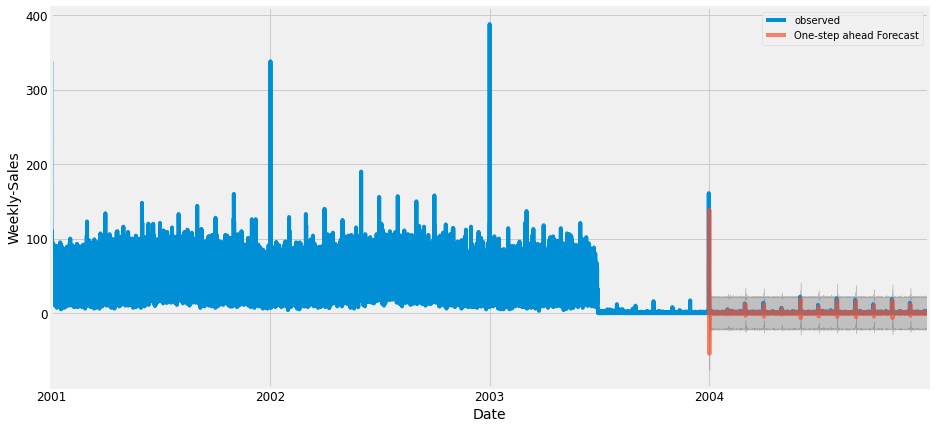

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2004-01-01 01:00:00'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2001':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly-Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2002-01-11 00:00:00':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4.27


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 2.07


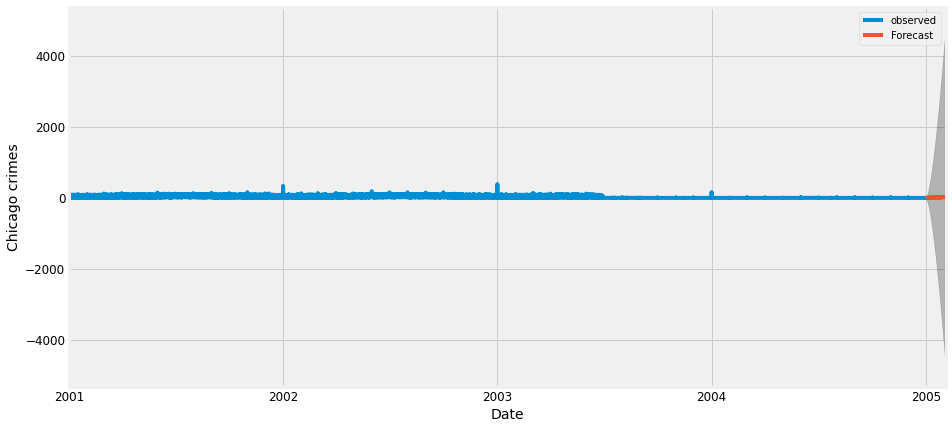

In [ ]:
pred_uc = results.get_forecast(steps=800)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Chicago crimes')
plt.legend()
plt.show()

In [ ]:
pred_uc.predicted_mean

2004-12-31 16:00:00     0.696346
2004-12-31 17:00:00     0.667544
2004-12-31 18:00:00     0.664812
2004-12-31 19:00:00     0.664553
2004-12-31 20:00:00     1.512955
                         ...    
2005-02-02 19:00:00    24.252109
2005-02-02 20:00:00    24.711103
2005-02-02 21:00:00    26.416067
2005-02-02 22:00:00    24.793088
2005-02-02 23:00:00    24.252095
Freq: H, Length: 800, dtype: float64

In [ ]:
pred_ci

lower Count  upper Count
2004-12-31 16:00:00   -20.988650    22.381342
2004-12-31 17:00:00   -22.951642    24.286729
2004-12-31 18:00:00   -24.334666    25.664290
2004-12-31 19:00:00   -25.608580    26.937685
2004-12-31 20:00:00   -25.971791    28.997700
...                          ...          ...
2005-02-02 19:00:00 -4813.085217  4861.589435
2005-02-02 20:00:00 -4821.582473  4871.004679
2005-02-02 21:00:00 -4828.817206  4881.649339
2005-02-02 22:00:00 -4839.363448  4888.949623
2005-02-02 23:00:00 -4848.811364  4897.315554

[800 rows x 2 columns]

In [ ]:
import pickle
filename = 'crimen_chicago'
pickle.dump(results, open(filename, 'wb'))

## Resultados
Para empezar, el set de datos es muy bueno, se cuenta con gran cantidad de registros y de calidad. Ahora bien, como se ve en la primera gráfica, la línea naranja y la línea azul van muy de la mano, lo que significa que el modelo es de calidad a la hora de hacer la predicción. Por último, analizando los resultados obtenidos, la predicción apunta a que los crímenes no aumenten ni disminuyan, según la predicción se mantendrán bastante constantes.
